In [0]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

image_path = 'lena_forsen.png'

image_string=tf.read_file(image_path) 
image=tf.image.decode_png(image_string,channels=3)
image=tf.image.convert_image_dtype(image,dtype=tf.float32)

In [0]:
def show_image(original_image,augmented_image,title):
  fig=plt.figure()
  fig.suptitle(title)
  
  original_plt=fig.add_subplot(1,2,1)
  
  original_plt.set_title('original image')
  original_plt.imshow(original_image)
 
  augmented_plt=fig.add_subplot(1,2,2) 
  augmented_plt.set_title('augmented image')
  augmented_plt.imshow(augmented_image)
  plt.show(block=True)

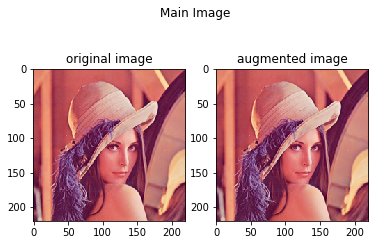

In [5]:
show_image(image, image, "Main Image") # image without any further processing

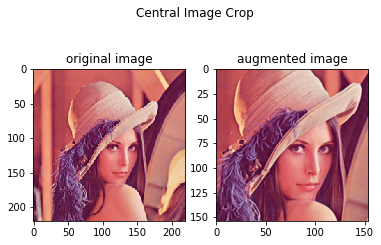

In [6]:
central_image = tf.image.central_crop(image, central_fraction=0.7)
show_image(image, central_image, "Central Image Crop")

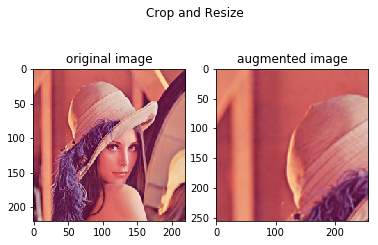

In [7]:
im = tf.expand_dims(image, 0)
crop_and_resize = tf.image.crop_and_resize(im, boxes=[[0.0, 0.0, 0.5, 0.5]], crop_size=[256, 256], box_ind=[0])

show_image(image, tf.squeeze(crop_and_resize, 0), "Crop and Resize")

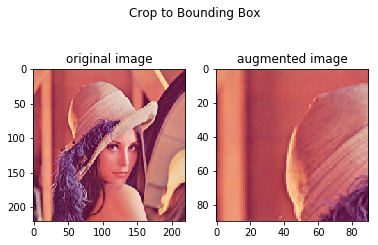

In [8]:
top_left = tf.image.crop_to_bounding_box(image, 10, 10, 90, 90)
show_image(image, top_left, "Crop to Bounding Box")

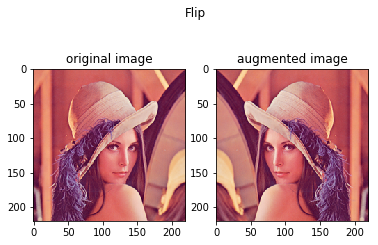

In [9]:
flip_image = tf.image.flip_left_right(image)
show_image(image, flip_image, "Flip")

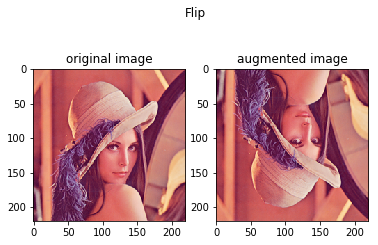

In [10]:
flip_image = tf.image.flip_up_down(image)
show_image(image, flip_image, "Flip")

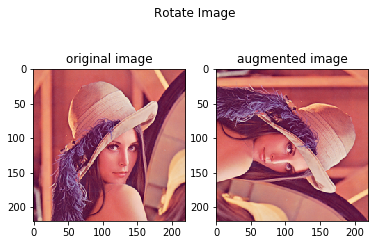

In [11]:
import math

rotate_image = tf.contrib.image.rotate(image, math.radians(270))
show_image(image, rotate_image, "Rotate Image")

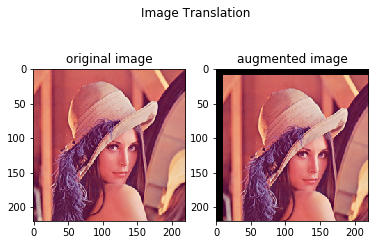

In [13]:
move_image = tf.contrib.image.translate(image, translations=[10, 10])
show_image(image, move_image, "Image Translation")

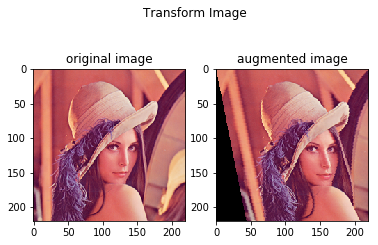

In [14]:
theta = -0.2
transforms = [1, tf.sin(theta), 0, 0, tf.cos(theta), 0, 0, 0]

transform_image = tf.contrib.image.transform(image, transforms=transforms)
show_image(image, transform_image, "Transform Image")

In [17]:
!pip install scikit-image

In [0]:
import numpy as np
from skimage.util import random_noise

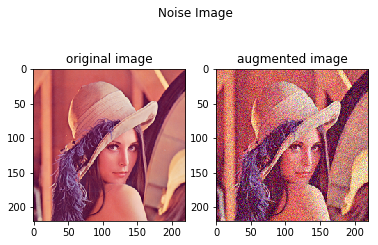

In [19]:
image_array = np.asarray(image)
noise_image = random_noise(image_array, mode="gaussian", var=0.01)

show_image(image, noise_image, "Noise Image")

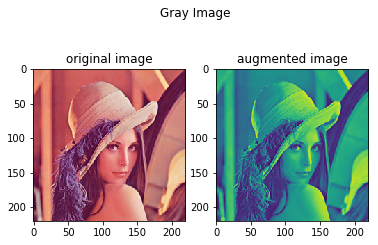

In [23]:
gray_image = tf.image.rgb_to_grayscale(image)
show_image(image, tf.squeeze(gray_image), "Gray Image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


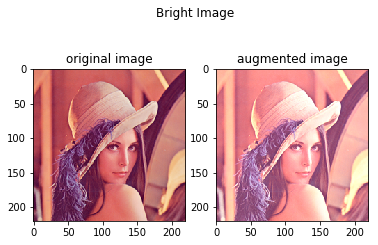

In [24]:
bright_image = tf.image.adjust_brightness(image, 0.2)
show_image(image, bright_image, "Bright Image")

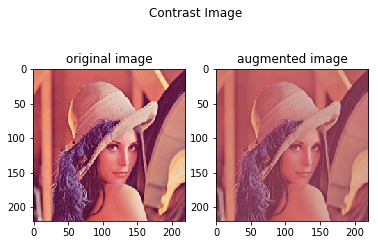

In [25]:
contrast_image = tf.image.adjust_contrast(image, contrast_factor=0.6)
show_image(image, contrast_image, "Contrast Image")

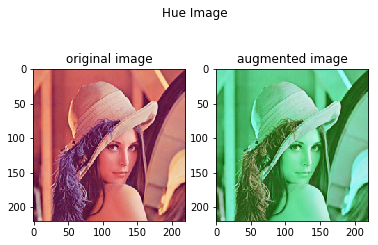

In [27]:
hue_image = tf.image.adjust_hue(image, delta=0.4)
show_image(image, hue_image, "Hue Image")

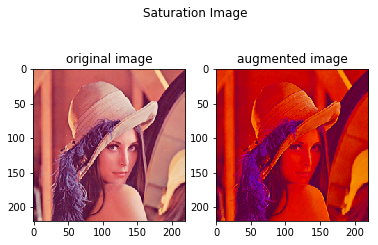

In [28]:
saturation_image = tf.image.adjust_saturation(image, 5)
show_image(image, saturation_image, "Saturation Image")